# Performing Analysis of Meteorological Data

## Importing needed Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing weatherHistory.csv file and Viewing the First Five Rows present in weatherHistory.csv

In [2]:
weather_data = pd.read_csv("weatherHistory.csv")
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Checking the Shape or Dimension of Data using .shape Attribute

In [3]:
weather_data.shape

(96453, 12)

## Checking Information about our Data using .info() Function

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Describing our Data using .describe() Function

In [5]:
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Finding Null values in our Data and Sum it using .isnull().sum() Function

In [6]:
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Observation:
In ‘Precip Type’, there are 517 missing values.
‘Wind Bearing (degrees)’ has only integer values
Formatted Date is in String.
Minimum values of Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km) are Zero and they can be Zero.
We only need 3 columns for our task which is data[‘Formatted Date’, ‘Apparent Temperature(c)’, ‘Humidity’]. So, we can ignore the missing values

## Finding Unique Values in Loud Cover Column using .unique() Function

In [7]:
weather_data['Loud Cover'].unique()

array([0.])

## Removing Unwanted Column

In [8]:
weather_data = weather_data.drop(['Loud Cover'], axis = 1)

## Pairwise correlation of all columns in the data frame

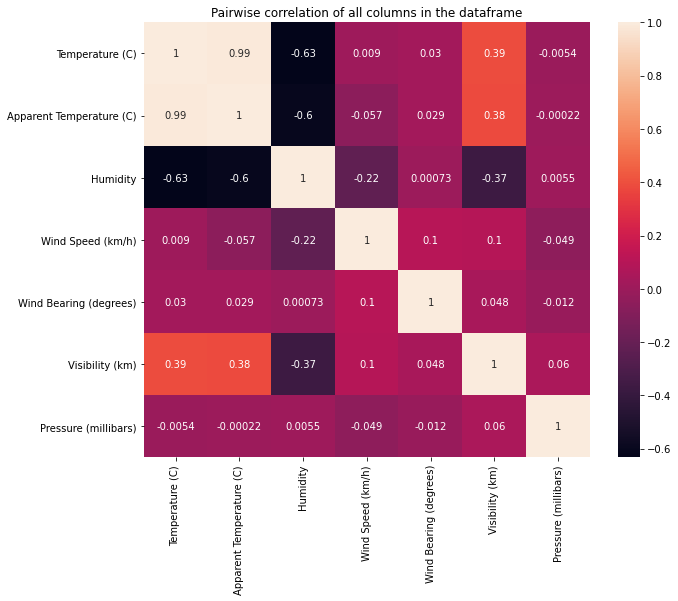

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data = weather_data.corr(),annot=True)
plt.title("Pairwise correlation of all columns in the dataframe")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

## For better visualization we need to change the datatype of the ‘Formatted Date’ column to datetime.

In [10]:
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'],utc=True)

## Setting the Formatted Date column as a index in our dataset.

In [11]:
weather_data = weather_data.set_index('Formatted Date')


## Viewing Our Data

In [12]:
weather_data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.


## Resampling the Data
Now, we have hourly data, we need to resample it to monthly.
Resampling is a convenient method for frequency conversion. 
The object must have a datetime like an index.
We only require the Apparent Temperature and humidity columns to test the hypothesis. So, we will consider these two columns and perform a resample() function from Pandas.

In [13]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = weather_data[df_column].resample("MS").mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


The above function converts hourly data to monthly data using “MS” which denotes the Month starting. We are displaying the average apparent temperature and humidity using the mean() function.

## Relation between Apparent Temperature & Humidity Using Regplot
### We use the regplot() function to plot the relationship between the “Apparent Temperature ” and “Humidity”.

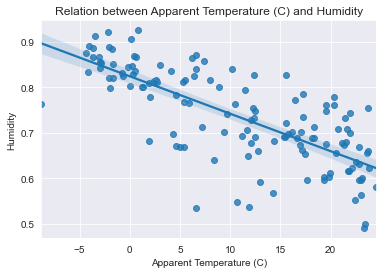

In [14]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

## Correlation between Apparent temperature & Humidity

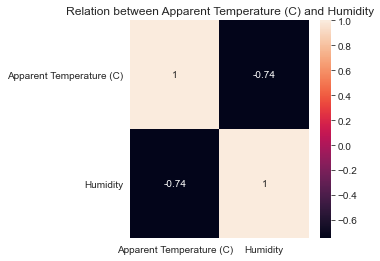

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Relation between Apparent Temperature (C) and Humidity")
sns.heatmap(data=df_monthly_mean.corr(), annot=True)
plt.show()

## Pair plot for correlation of Apparent temperature & Humidity
### We use the pairplot() function to plot the correlation of the “Apparent Temperature ” and “Humidity”.

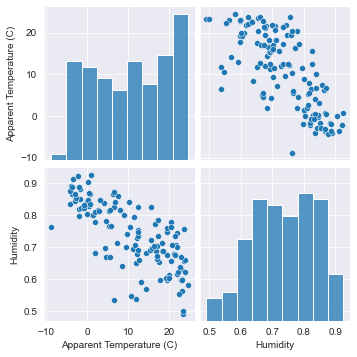

In [16]:
sns.pairplot(df_monthly_mean, kind='scatter')

## Observation:
There is a Linear Relation between “Apparent Temperature ” and “Humidity” with a negative slope. As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases.
We use lineplot() function to plot the Variation of Apparent Temperature and Humidity with time.

## Using lineplot() function to plot the Variation of Apparent Temperature and Humidity with time.

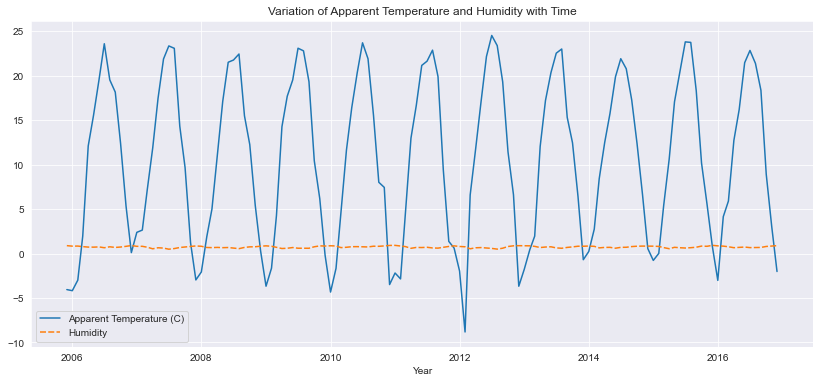

In [17]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel("Year")
plt.title("Variation of Apparent Temperature and Humidity with Time")
plt.show()

## Observation:
The above graph displays average temperature and humidity for all 12 months over the 10 years i.e., from 2006 to 2016.
From the above plot,
1. “Humidity” remained constant from 2006–2016
2. “Apparent Temperature ” changed from 2006–2016 at regular intervals with constant amplitude.

## 2D Scatter Plot with Color Coding for each Summary type
We use a FacetGrid object with a scatterplot to plot the summary types of different weather conditions to Temperature and Humidity.

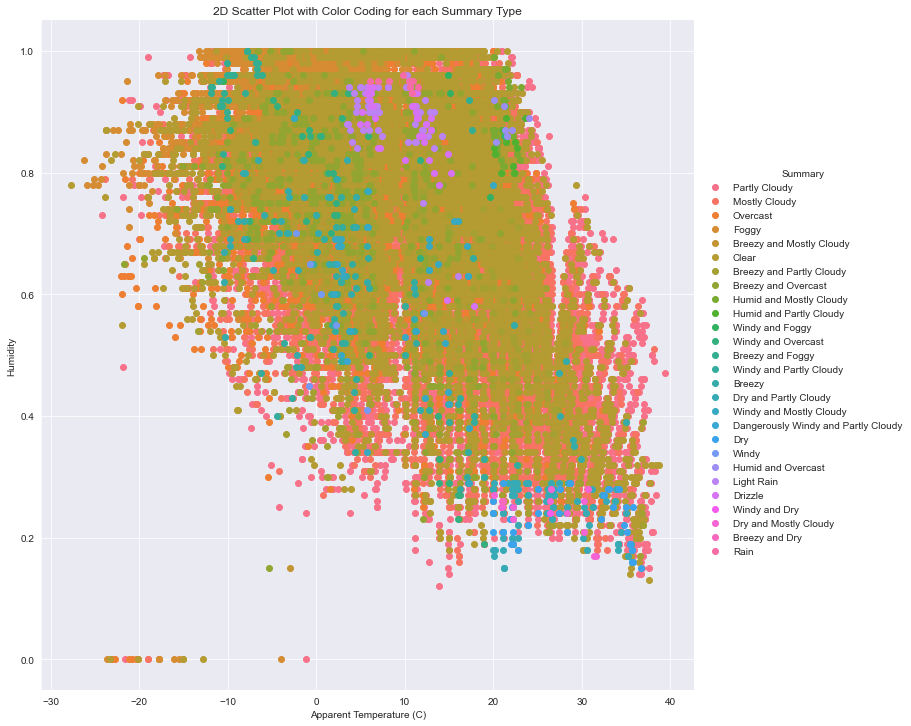

In [18]:
sns.FacetGrid(weather_data, hue="Summary", height=10).map(plt.scatter,
    "Apparent Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary Type")
plt.show()

## Observation:
1. There are very few outliers.
2. Mostly Weather is Clear or Partly Cloudy/Rainy in Finland.
3. Only a few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.

## Univariate Analysis For Apparent Temperature

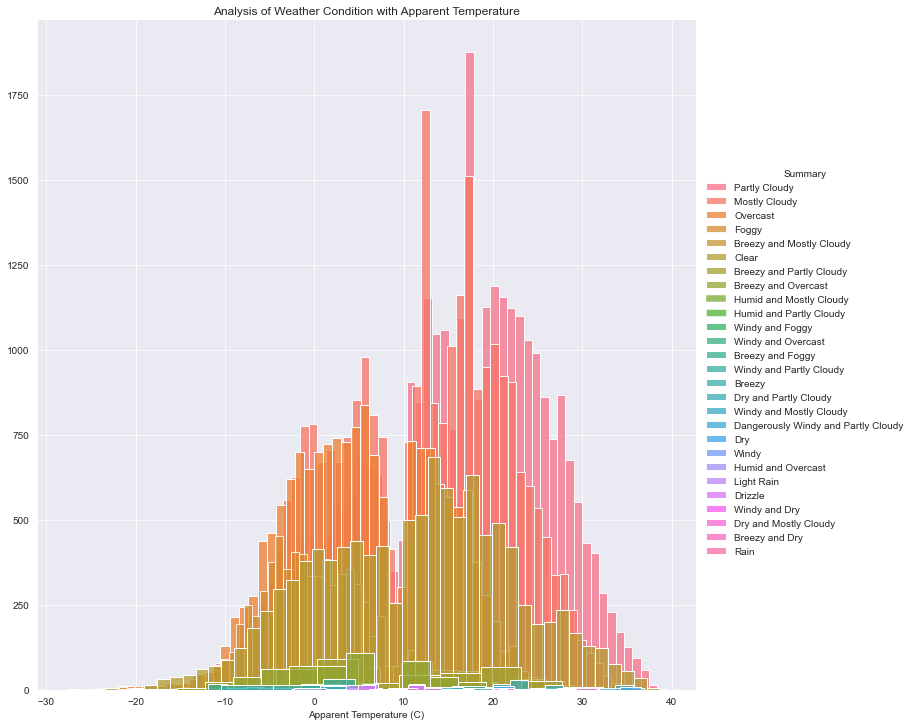

In [19]:
sns.FacetGrid(weather_data, hue="Summary", height=10).map(sns.histplot,
    "Apparent Temperature (C)").add_legend()
plt.title("Analysis of Weather Condition with Apparent Temperature")
plt.show()

## Univariate Analysis For Humidity

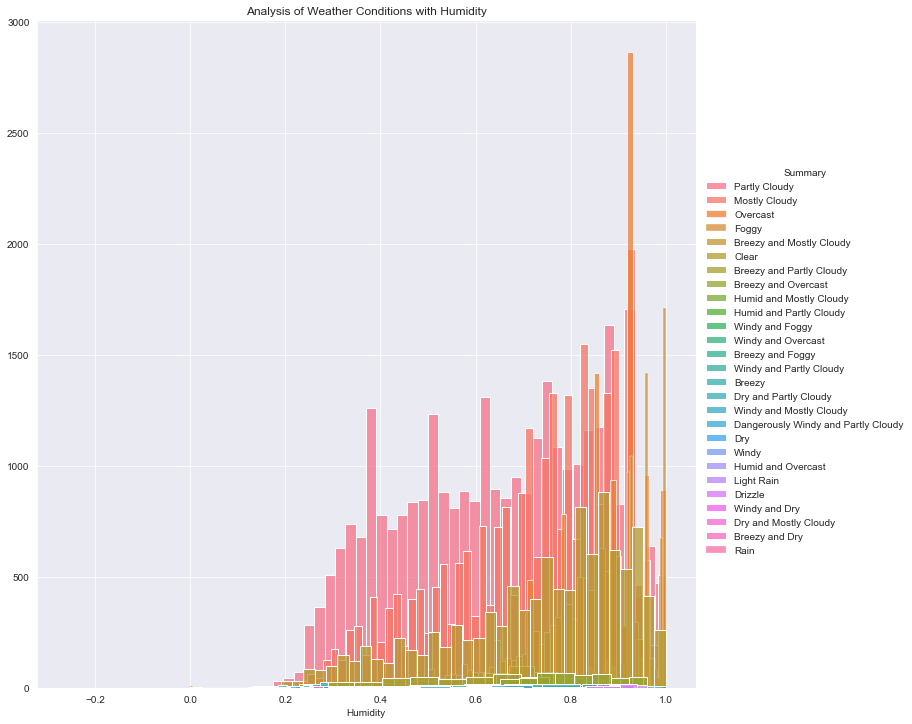

In [20]:
sns.FacetGrid(weather_data, hue="Summary", height=10).map(sns.histplot,
        "Humidity").add_legend()
plt.title("Analysis of Weather Conditions with Humidity")
plt.show()

## Function for plotting Humidity & Apparent Temperature for all months

In [21]:
Temp_data = df_monthly_mean.iloc[:,0]
Hum_data = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

This function helps to analyze the variations in Apparent Temperature and Humidity for all months over the 10 years.

## Month-wise Plot for Apparent Temperature of 10 years.

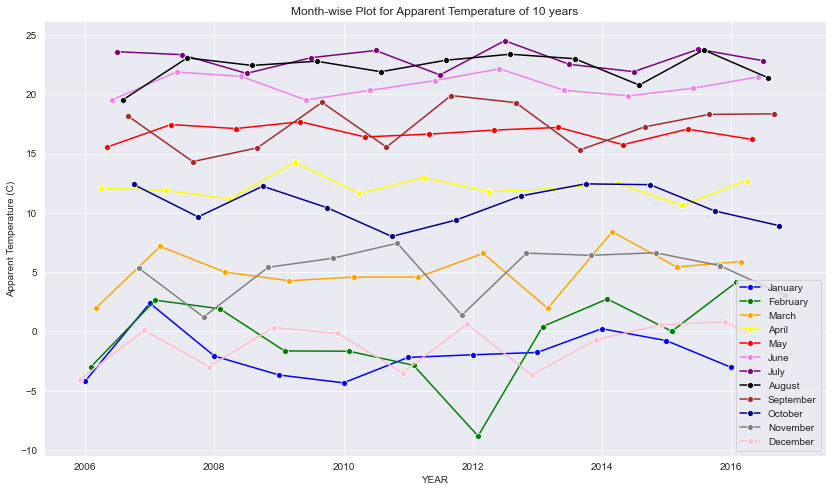

In [22]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, Temp_data)

This graph shows the changes in Temperature for each month from 2006 to 2016.

## Month-wise Plot for Humidity of 10 years

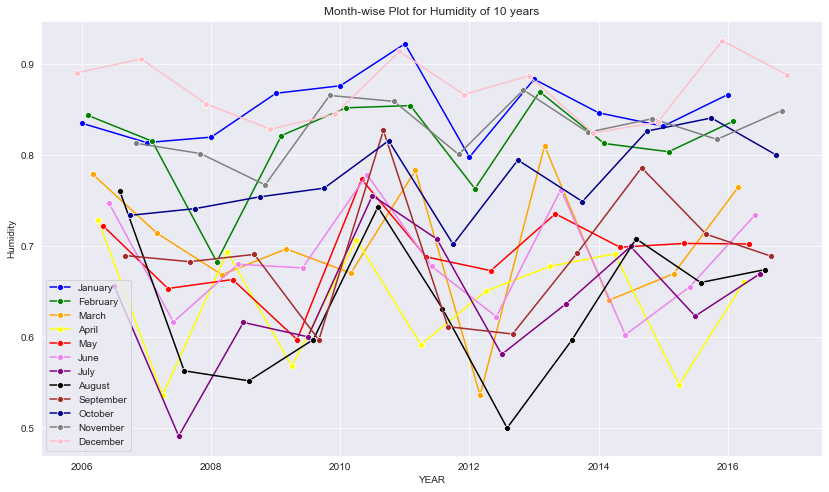

In [23]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, Hum_data)

This graph shows the changes in Humidity for each month from 2006 to 2016.

## Function for plotting Humidity & Apparent Temperature for each month

This function helps to analyze the variations in Apparent Temperature and Humidity for each month over the 10 years.

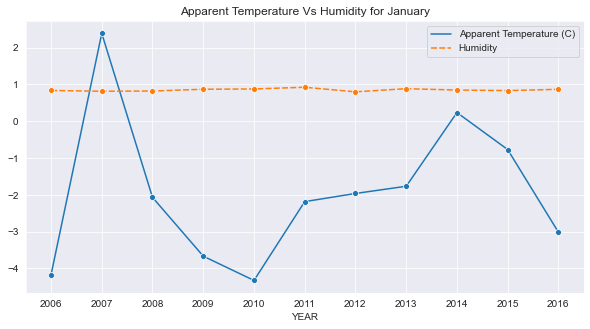

--------------------------------------------------------------------------------


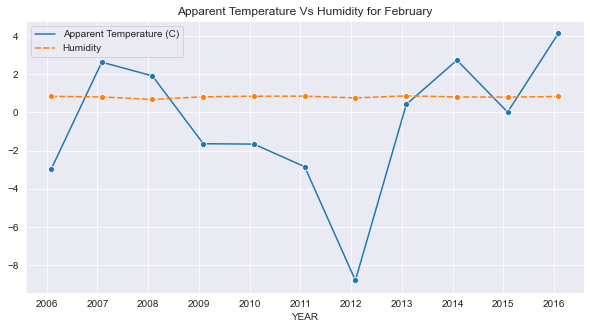

--------------------------------------------------------------------------------


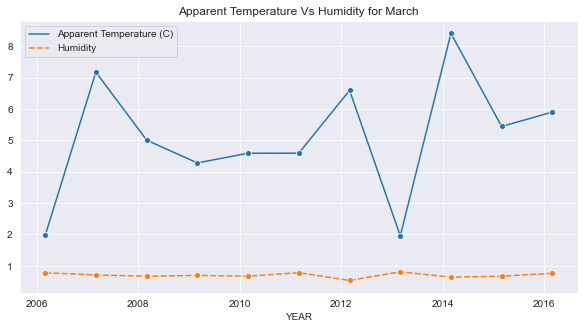

--------------------------------------------------------------------------------


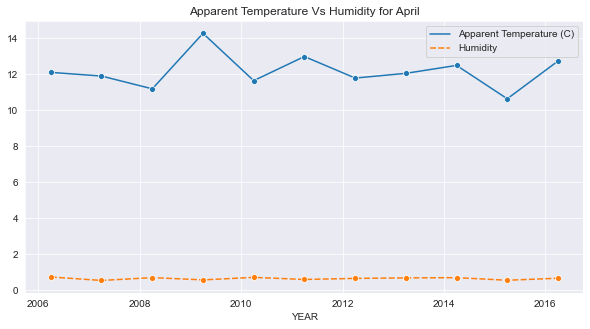

--------------------------------------------------------------------------------


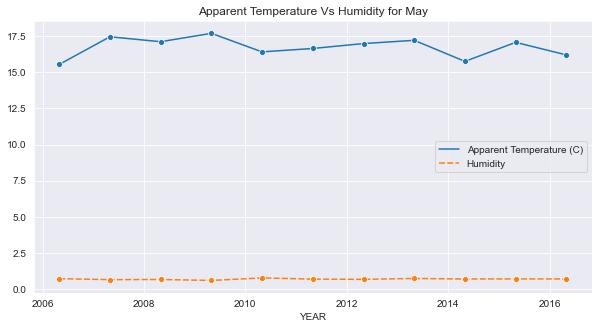

--------------------------------------------------------------------------------


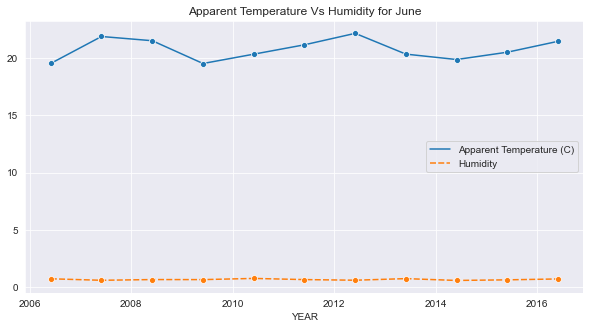

--------------------------------------------------------------------------------


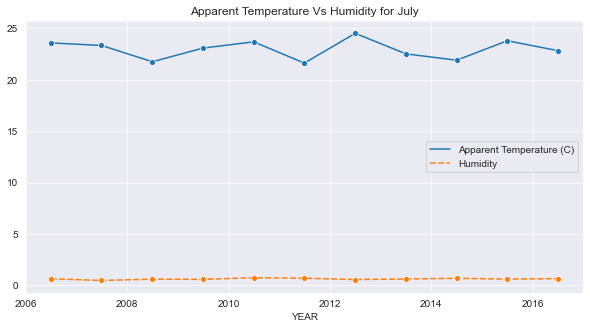

--------------------------------------------------------------------------------


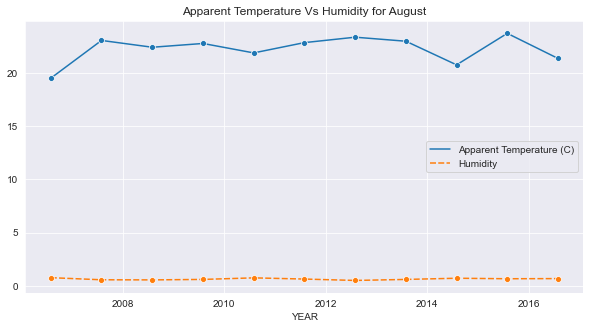

--------------------------------------------------------------------------------


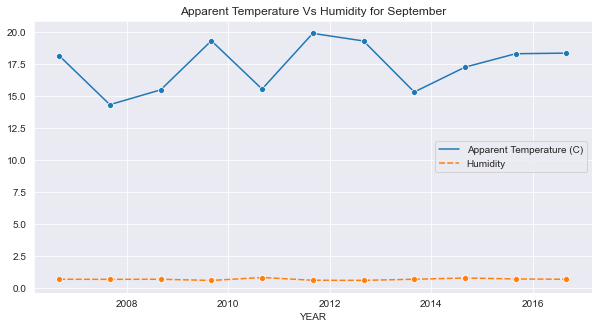

--------------------------------------------------------------------------------


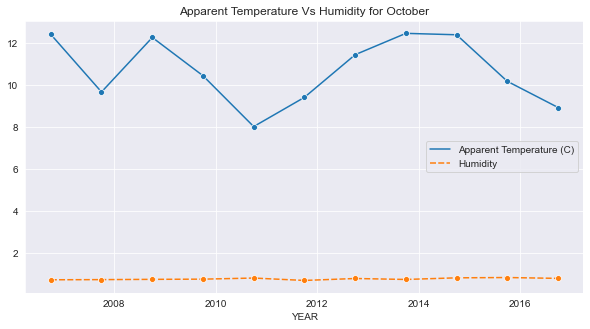

--------------------------------------------------------------------------------


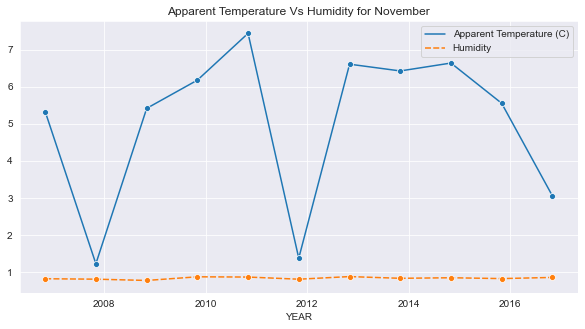

--------------------------------------------------------------------------------


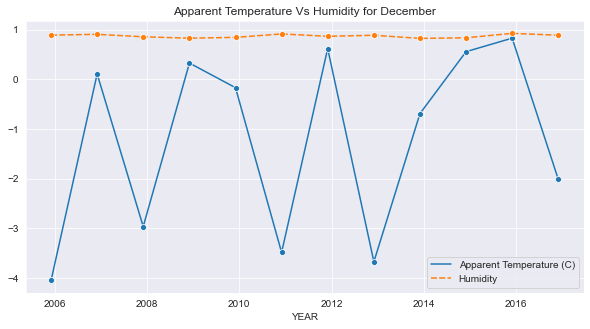

--------------------------------------------------------------------------------


In [24]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    print('-'*80)
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

## The above graphs shows the variations in Apparent Temperature and Humidity for each month from 2006 to 2016.

## Conclusion: From this analysis, We can conclude that the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming.